C:\Users\aminf\AppData\Local\Temp\ipykernel_12980\3150626216.py:13: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  a0 = (1 / L) * np.trapz(f_vals, x)
C:\Users\aminf\AppData\Local\Temp\ipykernel_12980\3150626216.py:20: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  a_n_val = (1 / L) * np.trapz(f_vals * cos_nx, x)
C:\Users\aminf\AppData\Local\Temp\ipykernel_12980\3150626216.py:21: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  b_n_val = (1 / L) * np.trapz(f_vals * sin_nx, x)


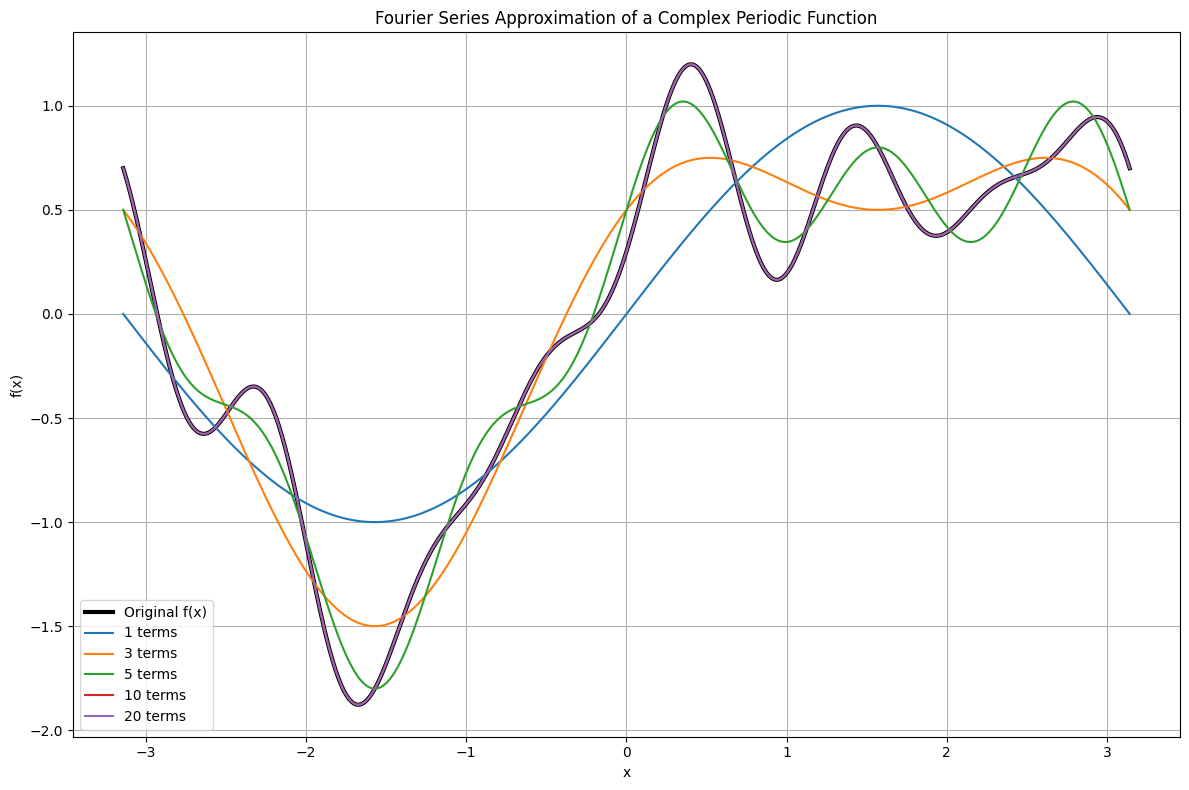

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.sin(x) + 0.5 * np.cos(2 * x) + 0.3 * np.sin(5 * x) - 0.2 * np.cos(7 * x)

# Domain
x = np.linspace(-np.pi, np.pi, 1000)
f_vals = f(x)

def compute_coefficients(N, x, f_vals):
    L = np.pi  # Period range [-pi, pi]
    a0 = (1 / L) * np.trapz(f_vals, x)

    a_n = []
    b_n = []
    for n in range(1, N + 1):
        cos_nx = np.cos(n * x)
        sin_nx = np.sin(n * x)
        a_n_val = (1 / L) * np.trapz(f_vals * cos_nx, x)
        b_n_val = (1 / L) * np.trapz(f_vals * sin_nx, x)
        a_n.append(a_n_val)
        b_n.append(b_n_val)

    return a0, np.array(a_n), np.array(b_n)

def fourier_approx(x, a0, a_n, b_n):
    result = np.full_like(x, a0 / 2)
    for n in range(1, len(a_n) + 1):
        result += a_n[n-1] * np.cos(n * x) + b_n[n-1] * np.sin(n * x)
    return result

approximation_degrees = [1, 3, 5, 10, 20]

plt.figure(figsize=(12, 8))
plt.plot(x, f_vals, label='Original f(x)', linewidth=3, color='black')

for N in approximation_degrees:
    a0, a_n, b_n = compute_coefficients(N, x, f_vals)
    approx_vals = fourier_approx(x, a0, a_n, b_n)
    plt.plot(x, approx_vals, label=f'{N} terms')

plt.title("Fourier Series Approximation of a Complex Periodic Function")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
